In [1]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()


Number of apps: 
418


Total entries:
2129
Number of apps: 
418


Total entries:
2129


Total covered methods:
4233096


Everything is good!


Coverage report

In [2]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.deluxapps.carb.foods.guide,com.deluxapps.carb.foods.guide.BuildConfig,BuildConfig (): void,systematic,method,0,0,1,com.deluxapps.carb.foods.guide
1,com.deluxapps.carb.foods.guide,com.deluxapps.carb.foods.guide.BuildConfig,BuildConfig (): void,systematic,block,0,0,3,com.deluxapps.carb.foods.guide
2,com.deluxapps.carb.foods.guide,com.deluxapps.carb.foods.guide.R,R (): void,systematic,method,0,0,1,com.deluxapps.carb.foods.guide
3,com.deluxapps.carb.foods.guide,com.deluxapps.carb.foods.guide.R,R (): void,systematic,block,0,0,3,com.deluxapps.carb.foods.guide
4,com.deluxapps.carb.foods.guide,com.deluxapps.carb.foods.guide.R$array,R$array (): void,systematic,method,0,0,1,com.deluxapps.carb.foods.guide


Systematic App coverage

In [3]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = systematic_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
com.theronrogers.vaultyfree              100.000000
com.junjundroid.gordyn                    91.304348
com.snaptattooadder                       81.538462
com.watchtv.freetv                        78.947368
com.nglish.spanish.english.translator     75.342466
Name: coverage_percentage, dtype: float64

Random App coverage

In [4]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = random_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
com.theronrogers.vaultyfree       100.000000
com.snaptattooadder                95.384615
com.watchtv.freetv                 94.736842
com.junjundroid.gordyn             91.304348
uk.co.resortmarketing.curryguy     64.627660
Name: coverage_percentage, dtype: float64

Plot random vs systematic app coverage per app

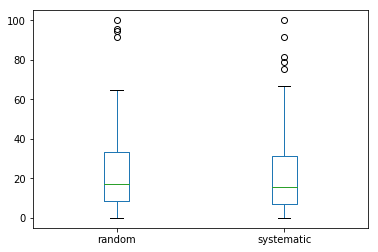

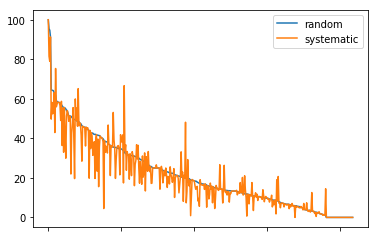

In [5]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

In [6]:
random_and_systematic_coverage.describe()

,random,systematic
count,418.000000,418.000000
mean,21.978019,20.396546
std,18.149029,17.488056
min,0.000000,0.000000
25%,8.492732,7.131932
50%,17.226094,15.750883
75%,33.146067,31.209239
max,100.000000,100.000000


Block app coverage

In [7]:
random_block_coverage_per_app = random_coverage_per_app = \
    CoverageHelper.filter("block", "random", coverage_df).groupby(["app"])[
        ['covered_lines', 'total_lines']].apply(
        lambda x: x.sum())
random_block_coverage_per_app['percentage_covered'] = (random_block_coverage_per_app.covered_lines / random_block_coverage_per_app.total_lines) * 100
random_block_coverage_per_app.head()
random_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,418.000000,4.180000e+02,418.000000
mean,7095.672249,6.305442e+04,20.236963
std,13641.305668,1.389811e+05,18.902051
min,0.000000,3.000000e+00,0.000000
25%,382.500000,2.719500e+03,6.416502
50%,2261.500000,1.421450e+04,13.968968
75%,7001.500000,5.596125e+04,30.374268
max,107070.000000,1.496391e+06,100.000000


In [8]:
systematic_block_coverage_per_app = systematic_coverage_per_app = CoverageHelper.filter("block", "systematic", coverage_df).groupby(["app"])[
    ['covered_lines', 'total_lines']].apply(
    lambda x: x.sum())
systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
systematic_block_coverage_per_app.head()
# systematic_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
app,,,
alex.map.maps,484,6844,7.071888
androidlab.carlog,787,6599,11.926049
appinventor.ai_agiapplications.CountYourSteps,0,527,0.000000
asp.aniemo.pack6.ext,103,182,56.593407
bestfreelivewallpapers.funny_photo_editor,5294,121368,4.361941


In [9]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.percentage_covered.rename('random'), systematic_block_coverage_per_app.percentage_covered.rename('systematic')], axis=1,
    sort=False)
random_and_systematic_block_coverage.head()


,random,systematic
app,,
alex.map.maps,20.455874,7.071888
androidlab.carlog,10.744052,11.926049
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000
asp.aniemo.pack6.ext,56.593407,56.593407
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941


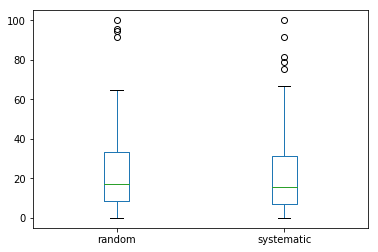

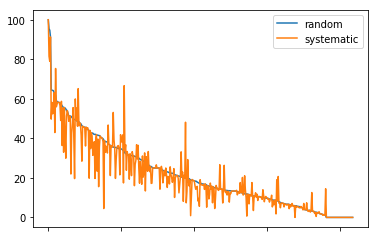

In [10]:
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

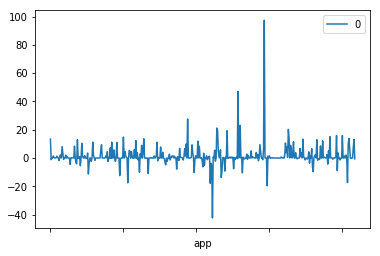

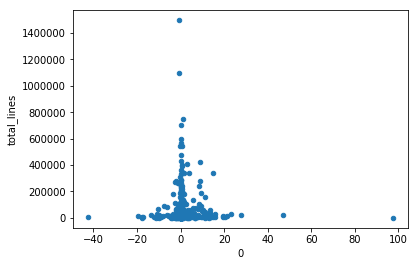

In [11]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame()
diff_in_coverage_per_app.plot()
diff_in_coverage_per_app["total_lines"] = random_block_coverage_per_app.total_lines
diff_in_coverage_per_app.head()

diff_in_coverage_per_app.plot.scatter(x=0, y="total_lines")

# diff_in_coverage_per_app.describe()

,random,systematic,total_lines
app,,,
alex.map.maps,20.455874,7.071888,6844
androidlab.carlog,10.744052,11.926049,6599
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000,527
asp.aniemo.pack6.ext,56.593407,56.593407,182
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941,121368


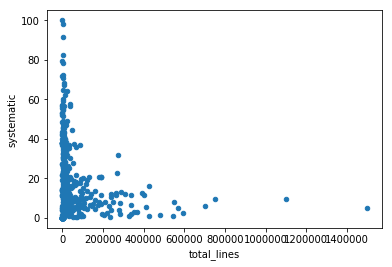

In [12]:

test = random_and_systematic_block_coverage
test["total_lines"] = random_block_coverage_per_app.total_lines
test.plot.scatter(y="systematic", x= "total_lines")
test.head()
